# Machine Learning Project 1 - Seoul Bike Sharing Demand
## Antonije Petrović 1253, January 2021

Dataset: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

References:

Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 202

Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020

# 1. Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [2]:
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")
data = pd.read_csv('SeoulBikeData.csv', 
                   parse_dates=['Date'],
                   date_parser=custom_date_parser,
                   encoding= 'unicode_escape')

This is how data originally looks like:

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# 2. Data Analysis

We can see that no data is missing:

In [4]:
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The types of the features are the following:

In [5]:
data.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

We can see the descriptional analysis of the continious features:

In [6]:
data.describe(exclude = [object, 'datetime64'], datetime_is_numeric=True)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Furthermore, we can see the descriptional analysis of the categorical features:

In [7]:
data.describe(include = [object])

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


Most of the features are continuous, but a few of them are categorical:

- **Seasons**, with possible values: *Winter*, *Spring*, *Summer*, *Autumn*
- **Holiday**, with possible values: *Holiday*, *No Holiday*
- **Functioning Day**, with possible values: *Yes*, *No*

## 2.1 Data visualization

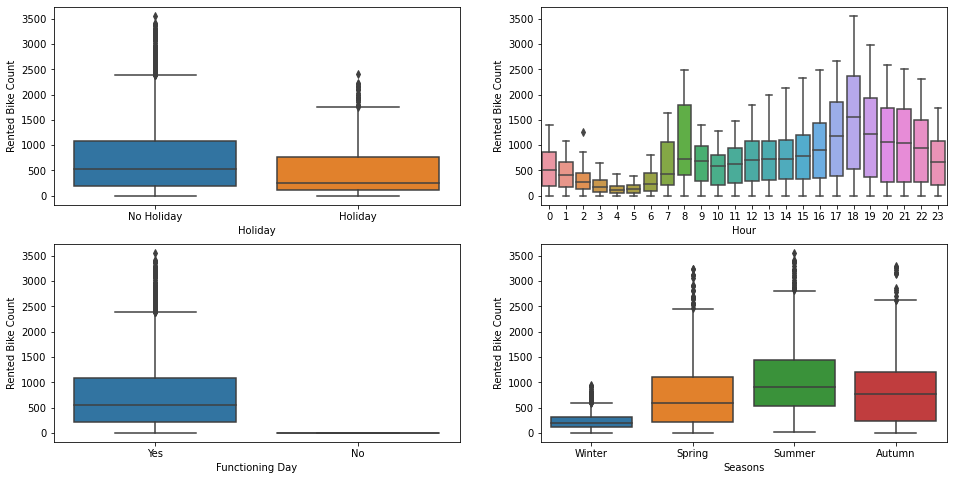

In [8]:
f, ax=plt.subplots(2, 2, figsize=(16, 8))

sb.boxplot(data=data,x="Holiday", y="Rented Bike Count", ax = ax[0,0])
sb.boxplot(data=data,x="Hour", y="Rented Bike Count", ax = ax[0,1])
sb.boxplot(data=data,x="Functioning Day", y="Rented Bike Count", ax = ax[1,0])
sb.boxplot(data=data,x="Seasons", y="Rented Bike Count", ax = ax[1,1])

plt.show()

We can see that when the "Functioning Day" features has a value "No", then the "Rented Bike Count" is always 0. This is because this feature means that those are the days when the software was not counting the rented bikes.

In [9]:
result_df = data.loc[data['Functioning Day'] == 'No']
print(len(result_df.loc[result_df['Rented Bike Count'] > 0]))

0


In [10]:
#numerical_data = data.select_dtypes(include=['float64', 'int64'])
#sb.pairplot(numerical_data)
#plt.show()

<AxesSubplot:>

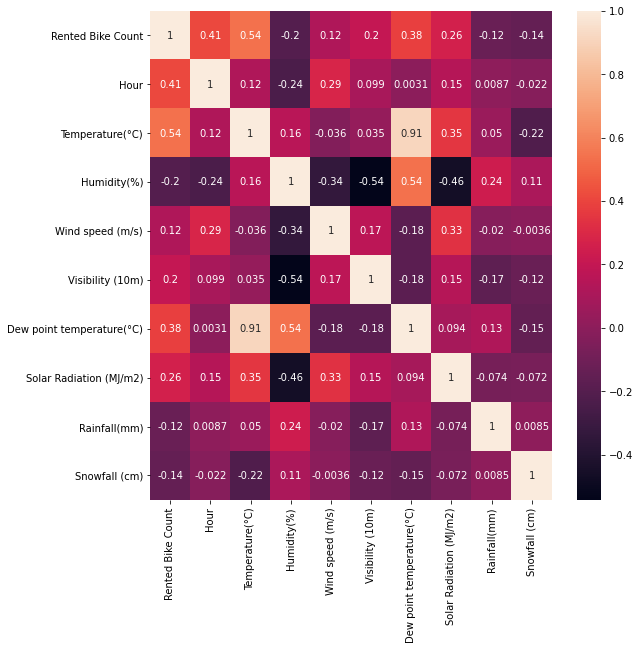

In [11]:
plt.subplots(figsize=(9, 9))
corr = data.corr()
sb.heatmap(corr, 
           annot=True,
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

Let's see the correlation between temperature and rented bike count now. The temperature values are scaled to fit the range of the rented bike count. It can be seen on the following plot that rented bike count fairly correlates to the temperature, with an exception during summer months when the temperatures are high.

Text(0.5, 0, 'Date')

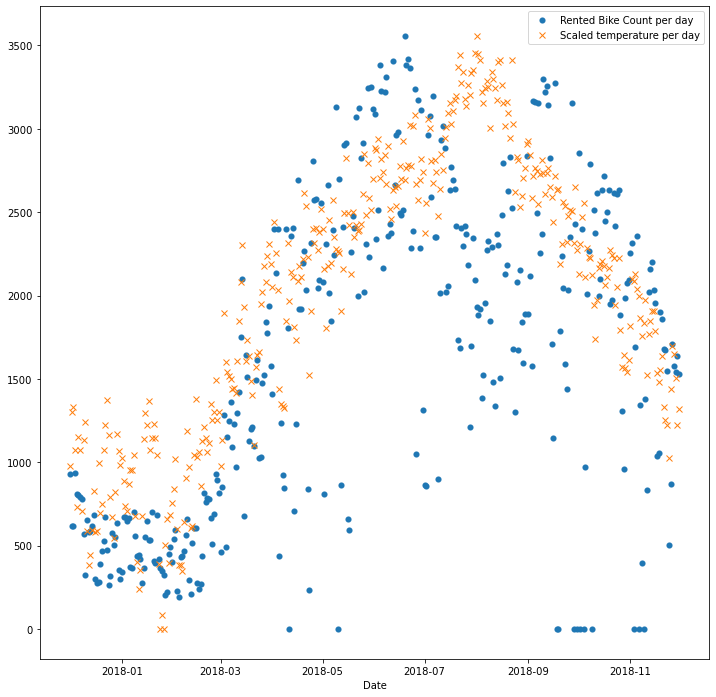

In [12]:
import matplotlib

fig, ax = plt.subplots(figsize=(12, 12))

dates = matplotlib.dates.date2num(data["Date"].unique())
bike_counts_per_day = data.groupby(["Date"])["Rented Bike Count"].max()
temperatures_per_day = data.groupby(["Date"])["Temperature(°C)"].max()

count_min, count_max = bike_counts_per_day.min(), bike_counts_per_day.max()
temp_min, temp_max = temperatures_per_day.min(), temperatures_per_day.max()

# scaling temperature values to range (count_min, count_max)
temperatures_per_day = (temperatures_per_day - temp_min) / (temp_max - temp_min) * (count_max - count_min) + count_min

plt.plot_date(dates, bike_counts_per_day, label="Rented Bike Count per day", mew=0.1)
plt.plot_date(dates, temperatures_per_day, marker='x', label="Scaled temperature per day")
plt.legend(loc="upper right")
plt.xlabel('Date')

## 2.2 Data preprocessing

There is a very strong correlation between features "Temperature" and "Dew point temperature" which is why the latter one will be removed. 

In [13]:
# Delete correlated column
data = data.drop(columns = ['Dew point temperature(°C)'])

Categorical features like "Seasons", "Holiday" or "Functioning day" should be encoded with some integer values. Simple integer encoding is not recommended since it creates a natural ordered relationship between the values and this may harm the model. For this reason, categorical features are "one-hot encoded".

In [14]:
data = pd.get_dummies(data, prefix_sep='_', drop_first=True)
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1,1


# 3. Regression Models

A simple function is defined for creating a model, using k-fold cross validation with 10 splits of the data.

In [15]:
#from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

# Function for testing model using  GridSearch for hyperparameter optimization
def test_model_2(data, model, use_scaling = False):    
    y = data['Rented Bike Count']
    x = data.drop(columns = ['Rented Bike Count'])

    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    
    regr = None
    if (model == 'LR'):
        regr = LinearRegression()
    elif (model == 'RFR'):
        regr = RandomForestRegressor(n_estimators=100, criterion='mse')
    elif (model == 'EN'):
        regr = ElasticNet(random_state=0)
    elif (model == 'KNN'):
        regr = KNeighborsRegressor(5, weights='distance')
    elif (model == 'LASSO'):
        regr = Lasso(alpha=0.1)
    elif (model == 'ADABOOST'):
        regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                                 n_estimators=100, 
                                 random_state=np.random.RandomState(1))
        
    max_depth = np.arange(1,10)
    min_samples_split = np.arange(2,10)
    min_samples_leaf = np.arange(2,10) 
    param_grid = {'max_depth': max_depth, 
                  'min_samples_split': min_samples_split, 
                  'min_samples_leaf': min_samples_leaf}
    
    pipe = make_pipeline(StandardScaler(), 
                         GridSearchCV(
                             estimator=regr, 
                             param_grid=param_grid, 
                             n_jobs=-1, 
                             #cv=kfold, 
                             refit=True))
    scores = model_selection.cross_val_score(pipe, x, y, cv=10)
    return scores, pipe    

def test_model(data, model, use_scaling = False):    
    y = data['Rented Bike Count']
    x = data.drop(columns = ['Rented Bike Count'])

    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    
    regr = None
    if (model == 'LR'):
        regr = LinearRegression()
    elif (model == 'RFR'):
        regr = RandomForestRegressor(n_estimators=100, criterion='mse')
    elif (model == 'EN'):
        regr = ElasticNet(random_state=0)
    elif (model == 'TREE'):
        regr = DecisionTreeRegressor()
    elif (model == 'KNN'):
        regr = KNeighborsRegressor(5, weights='distance')
    elif (model == 'LASSO'):
        regr = Lasso(alpha=0.1)
    elif (model == 'ADABOOST'):
        regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                                 n_estimators=100, 
                                 random_state=np.random.RandomState(1))
        
    pipe = None
    if (use_scaling):
        pipe = make_pipeline(StandardScaler(), regr)
    else:
        pipe = make_pipeline(regr)
    
    scores = model_selection.cross_val_score(pipe, x, y, cv=kfold)
    return scores, pipe

In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.drop('Date', axis = 1, inplace = True)

In [17]:
results_list = []

In [18]:
res, pipe = test_model(data, 'TREE')
results_list.append(("Decision Tree basic", res))

res, pipe = test_model(data, 'RFR')
results_list.append(("RFR basic", res))

res, pipe = test_model(data, 'LR')
results_list.append(("LR basic", res))

res, pipe = test_model(data, 'KNN')
results_list.append(("KNN basic", res))

res, pipe = test_model(data, 'LASSO')
results_list.append(("Lasso basic", res))

res, pipe = test_model(data, 'ADABOOST')
results_list.append(("Ada Boost basic", res))

In [19]:
res, pipe = test_model(data, 'TREE', True)
results_list.append(("Decision Tree with standardization", res))

res, best_pipe = test_model(data, 'RFR', True)
results_list.append(("RFR with standardization", res))

res, pipe = test_model(data, 'LR', True)
results_list.append(("LR with standardization", res))

res, pipe = test_model(data, 'KNN', True)
results_list.append(("KNN with standardization", res))

res, pipe = test_model(data, 'LASSO', True)
results_list.append(("Lasso with standardization", res))

res, pipe = test_model(data, 'ADABOOST')
results_list.append(("Ada Boost with standardization", res))

In [20]:
data['hour_sin'] = np.sin(2 * np.pi * data['Hour']/23.0)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour']/23.0)
data = data.drop(columns = ['Hour'])
data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Day,Month,Year,hour_sin,hour_cos
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,1,1,12,2017,0.000000,1.000000
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1,1,1,12,2017,0.269797,0.962917
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1,1,1,12,2017,0.519584,0.854419
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1,1,1,12,2017,0.730836,0.682553
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1,1,1,12,2017,0.887885,0.460065


In [21]:
res, pipe = test_model(data, 'TREE')
results_list.append(("Decision Tree Cyclical Hour", res))

res, pipe = test_model(data, 'RFR')
results_list.append(("RFR Cyclical Hour", res))

res, pipe = test_model(data, 'LR')
results_list.append(("LR Cyclical Hour", res))

res, pipe = test_model(data, 'KNN')
results_list.append(("KNN Cyclical Hour", res))

res, pipe = test_model(data, 'LASSO')
results_list.append(("Lasso Cyclical Hour", res))

res, pipe = test_model(data, 'ADABOOST')
results_list.append(("Ada Boost Cyclical Hour", res))

In [22]:
res, pipe = test_model(data, 'TREE', True)
results_list.append(("Decision Tree Cyclical Hour with standardization", res))

res, pipe = test_model(data, 'RFR', True)
results_list.append(("RFR Cyclical Hour with standardization", res))

res, pipe = test_model(data, 'LR', True)
results_list.append(("LR Cyclical Hour with standardization", res))

res, pipe = test_model(data, 'KNN', True)
results_list.append(("KNN Cyclical Hour with standardization", res))

res, pipe = test_model(data, 'LASSO', True)
results_list.append(("Lasso Cyclical Hour with standardization", res))

res, pipe = test_model(data, 'ADABOOST')
results_list.append(("Ada Boost Cyclical Hour with standardization", res))

In [23]:
for r in results_list:
    print(r[0] + " -> R2: " + str(r[1].mean()))

Decision Tree basic -> R2: 0.7871227622545625
RFR basic -> R2: 0.8851554460283066
LR basic -> R2: 0.5508609899634875
KNN basic -> R2: 0.5627252951065222
Lasso basic -> R2: 0.550844572632409
Ada Boost basic -> R2: 0.6561603798792653
Decision Tree with standardization -> R2: 0.7809310033493239
RFR with standardization -> R2: 0.8848836568903231
LR with standardization -> R2: 0.5508609899634833
KNN with standardization -> R2: 0.8060768434606149
Lasso with standardization -> R2: 0.5508640731567997
Ada Boost with standardization -> R2: 0.6561603798792653
Decision Tree Cyclical Hour -> R2: 0.7746109217511175
RFR Cyclical Hour -> R2: 0.8805397973852687
LR Cyclical Hour -> R2: 0.537490383657205
KNN Cyclical Hour -> R2: 0.4679350275783122
Lasso Cyclical Hour -> R2: 0.5374760552359235
Ada Boost Cyclical Hour -> R2: 0.646913408445571
Decision Tree Cyclical Hour with standardization -> R2: 0.7683290232484403
RFR Cyclical Hour with standardization -> R2: 0.8827442289148454
LR Cyclical Hour with stan

Results:

| Model | Basic | With standardization | Cyclical Hour | Cyclical Hour + Standardization |
| --- | --- | --- | --- | --- |
| Linear Regression | 0.5508 | 0.5508 | 0.5375 | 0.5375 |
| Random Forest | 0.8847 | 0.8849 | 0.8814 | 0.8817 |
| Decision Trees  | 0.7831 | 0.7829 | 0.7723 | 0.7787 |
| K-Nearest Neighors | 0.5627 | 0.8060 | 0.4679 | 0.8453 |
| Lasso | 0.5508 | 0.5508 | 0.5375 | 0.5375 |
| Ada Boost | 0.6561 | 0.6562 | 0.6469 | 0.6469 |

Older results, when column "Date" was completely removed:

| Model | Basic | With standardization | Cyclical Hour | Cyclical Hour + Standardization |
| --- | --- | --- | --- | --- |
| Linear Regression | 0.5477 | 0.5477 | 0.5347 | 0.5347 |
| Random Forest | 0.8727 | 0.8736 | 0.8697 | 0.8689 |
| Decision Trees  | 0.7633 | 0.7694 | 0.7457 | 0.7466 |
| K-Nearest Neighors | 0.5609 | 0.8002 | 0.4500 | 0.8301 |
| Lasso | 0.5477 | 0.5477 | 0.5347 | 0.5347 |
| Ada Boost | 0.6321 | 0.6321 | 0.6036 | 0.6036 |

# 4. Summary

The following regression models were used:

- Linear Regression
- K-Nearest Neighbors Regressor
- Random Forest Regressor
- Decision Trees Regressor
- Lasso Regressor
- Ada Boost with Decision Trees

The best results were achieved using Random Forest Regressor with the highest R^2 score of 0.8849

Standardization didn't always result in better scores. Furthermore, predefining column "Hour" in a cyclical way mostly resulted in worse scores. 

Not using column "Date" at all results in worse scores than using this column but separated in three columns: "Day", "Month" and "Year".